In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data

In [668]:
datapath = "dataset/"

df = pd.read_csv(datapath + 'data.csv')

In [669]:
df.head()

,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hfouls,afouls,hsaves,asaves,label
0,24,76,2,4,14,17,11,13,2,1,2
1,80,20,3,1,5,2,1,3,0,1,1
2,57,43,4,2,12,11,10,12,1,2,1
3,47,53,5,3,13,11,7,10,1,3,0
4,72,28,5,4,21,6,8,13,4,5,0


In [670]:
df.shape

(1272, 11)

# Nueral Net From Scratch

### Selected Data to Train

In [671]:
train, test = np.split(df.sample(frac=1, random_state=42), [int(0.8 * len(df))])

train.shape, test.shape

c:\Users\Public\Anaconda\envs\dsde-cp\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((1017, 11), (255, 11))

In [672]:
X = train.drop(columns=['label'])
y = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

X.shape, y.shape

((1017, 10), (1017,))

## init weights

In [673]:
W = np.random.randn(10, 3)
W

array([[-1.66877517, -1.03343958,  0.53474136],
       [-0.14779005, -2.67277014, -0.80465056],
       [ 0.05896317,  0.46087606,  0.21460681],
       [-0.16523046,  0.07480244, -0.5192766 ],
       [ 0.40440162, -1.3305602 , -1.23230272],
       [-0.52095714,  1.58611961,  1.76346351],
       [ 2.10809618, -0.22018916,  1.25853368],
       [-0.53304406,  1.43746814, -2.07700035],
       [ 0.01056678, -0.48191079, -0.049185  ],
       [ 0.81404711, -0.68792195, -0.52281739]])

In [674]:
W0 = np.random.randn(1, 3)
W0

array([[-0.7984785 ,  0.69451782, -0.94689115]])

## Forward Pass

In [675]:
# Forward pass
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

## Original Evaluation

In [676]:
logits = (X @ W + W0).to_numpy()  
probs = softmax(logits)         
preds = np.argmax(probs, axis=1) 

In [677]:
preds

array([2, 2, 2, ..., 2, 0, 2], shape=(1017,))

In [678]:
original_accuaracy = accuracy_score(y, preds)

print(f"Original Accuracy: {original_accuaracy:.2f}")

Original Accuracy: 0.30


In [679]:
eval_logits = (X_test @ W + W0).to_numpy()  
eval_probs = softmax(eval_logits)
eval_preds = np.argmax(eval_probs, axis=1)
origianl_eval_accuracy = accuracy_score(y_test, eval_preds)
print(f"Original Test Accuracy: {origianl_eval_accuracy:.2f}")

Original Test Accuracy: 0.36


# Training

### Loss Fuction

In [680]:
def cross_entropy_loss(probs, y_true):
    n = y_true.shape[0]
    log_probs = -np.log(probs[range(n), y_true])
    return np.sum(log_probs) / n

### One-hot encoder
class 0 -> [1, 0, 0]

class 1 -> [0, 1, 0]

class 2 -> [0, 0, 1]


In [681]:
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

In [682]:
learning_rate = 0.1
epochs = 1000
num_classes = 3
n_samples, n_features = X.shape

train_accuracy = []
test_accuracy = []

for epoch in range(epochs + 1):
    # Forward
    logits = np.dot(X, W) + W0
    probs = softmax(logits)
    loss = cross_entropy_loss(probs, y)

    # Back Propagate
    y_onehot = one_hot(y, num_classes)
    dlogits = (probs - y_onehot) / n_samples
    dW = np.dot(X.T, dlogits)
    dw0 = np.sum(dlogits, axis=0, keepdims=True)

    # Update Weights
    W -= learning_rate * dW
    W0 -= learning_rate * dw0

    # Log
    if epoch % 100 == 0:
        predictions = np.argmax(probs, axis=1)
        acc = np.mean(predictions == y) 
        train_accuracy.append(acc)
        
        eval_logits = np.dot(X_test, W) + dw0
        eval_probs = softmax(eval_logits)
        eval_preds = np.argmax(eval_probs, axis=1)
        eval_accuracy = accuracy_score(y_test, eval_preds)
        test_accuracy.append(eval_accuracy)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}, Eval Accuracy: {eval_accuracy:.2f}")

Epoch 0, Loss: 76.0307, Accuracy: 0.30, Eval Accuracy: 0.42
Epoch 100, Loss: 123.7272, Accuracy: 0.47, Eval Accuracy: 0.22
Epoch 200, Loss: 64.6786, Accuracy: 0.38, Eval Accuracy: 0.61
Epoch 300, Loss: 114.5832, Accuracy: 0.60, Eval Accuracy: 0.60
Epoch 400, Loss: 99.7302, Accuracy: 0.28, Eval Accuracy: 0.61
Epoch 500, Loss: 108.5174, Accuracy: 0.49, Eval Accuracy: 0.40
Epoch 600, Loss: 85.2158, Accuracy: 0.57, Eval Accuracy: 0.52
Epoch 700, Loss: 122.5723, Accuracy: 0.43, Eval Accuracy: 0.53
Epoch 800, Loss: 54.3582, Accuracy: 0.61, Eval Accuracy: 0.49
Epoch 900, Loss: 71.2512, Accuracy: 0.49, Eval Accuracy: 0.41
Epoch 1000, Loss: 57.4079, Accuracy: 0.58, Eval Accuracy: 0.52


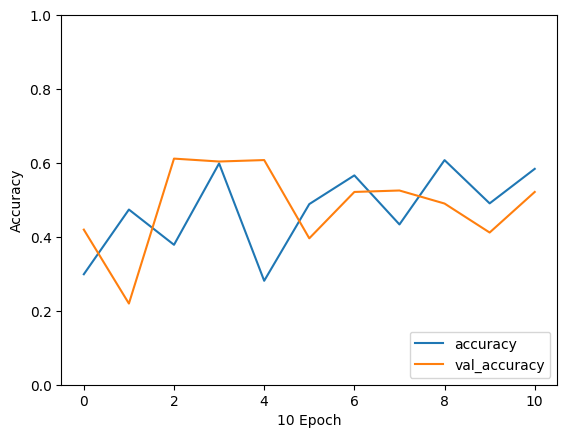

In [683]:
plt.plot(train_accuracy, label='accuracy')
plt.plot(test_accuracy, label = 'val_accuracy')
plt.xlabel('10 Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evalution

In [684]:
logits = np.dot(X_test, W) + dw0
probs = softmax(logits)
preds = np.argmax(probs, axis=1)
accuracy = accuracy_score(y_test, preds)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.52


# Inferrence

In [685]:
# Inter Milan
homeTeamName = "Inter Milan"
homeAveragePossesion = 56.5
homeAverageShots = 14.6
homeAverageShotsOnTarget = 4.9
homeAverageFouls = 10.8
homeAverageSaves = 5

# PSG
awayTeamName = "PSG"
awayAveragePossesion = 66.6
awayAverageShots = 18.8
awayAverageShotsOnTarget = 7.9
awayAverageFouls = 10
awayAverageSaves = 3

result_map = {
    0: "Draw",
    1: f"{homeTeamName} Win",
    2: f"{awayTeamName} Win"
}

X = np.array([[homeAveragePossesion, awayAveragePossesion, homeAverageShotsOnTarget, awayAverageShotsOnTarget, homeAverageShots, awayAverageShots, homeAverageFouls, awayAverageFouls, homeAverageSaves, awayAverageSaves]])
logits = np.dot(X, W) + W0
probs = softmax(logits)
preds = np.argmax(probs, axis=1)
print(f"Predicted class: {preds[0]}")
print(f"Predicted result: {result_map[preds[0]]}")
print(f"Predicted probabilities: {[f'{p:.2f}' for p in probs[0]]}")
print(f'Model Accuracy: {accuracy:.2f}')

 

Predicted class: 1
Predicted result: Inter Milan Win
Predicted probabilities: ['0.00', '1.00', '0.00']
Model Accuracy: 0.52


In [686]:
print(f'Original Accuracy: {original_accuaracy:.2f}')
print(f'Original Test Accuracy: {origianl_eval_accuracy:.2f}')
print(f'Final Test Accuracy: {accuracy:.2f}')
print(f'Final Test Accuracy: {eval_accuracy:.2f}')

Original Accuracy: 0.30
Original Test Accuracy: 0.36
Final Test Accuracy: 0.52
Final Test Accuracy: 0.52


In [687]:
W

array([[-3.72558597e-01,  7.46139291e-03, -1.80237619e+00],
       [-1.89867600e+00,  8.86536112e-02, -1.81518836e+00],
       [-7.45870821e+00,  1.79214469e+01, -9.72829264e+00],
       [-1.66568040e+00, -1.09372695e+01,  1.19932453e+01],
       [ 1.37883136e+00, -1.47549607e+00, -2.06179660e+00],
       [ 1.77542563e+00, -2.07363309e+00,  3.12683345e+00],
       [ 1.48085052e+00,  4.41292931e-01,  1.22429725e+00],
       [ 5.11873737e-01,  1.27234506e-01, -1.81168451e+00],
       [ 1.12446892e+00,  4.00298998e+00, -5.64798791e+00],
       [ 1.76835856e+00, -4.32531088e+00,  2.16026009e+00]])